### Kaggle challenge: house prices advanced regression techniques

In [271]:
## load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import missingno as ms

In [272]:
## matplot lib graphing review 
#plt.plot([0,2,4,6],[1,2,3,4])
#plt.ylabel('practice')
#plt.xlabel('generated')
#plt.show()

In [273]:
## load data
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**EDA**

In [274]:
##shape
df.shape

(1460, 81)

In [275]:
##columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Outcome variable: `SalePrice`

In [276]:
## numeric summary of SalePrice variable
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

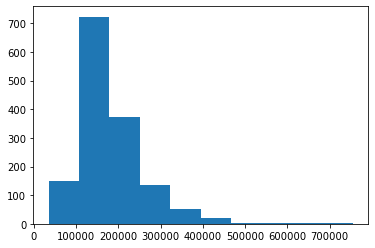

In [277]:
## check distributionof outcome variable
plt.hist('SalePrice', data=df)

Distribution of outcome variable seems skewed. Confirm using probability plot:

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512989))

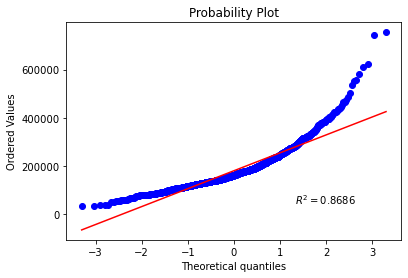

In [278]:
## prob plot to check for lack of normality/presence of skewness
stats.probplot(df.SalePrice, dist="norm", fit=True, rvalue=True, plot=plt)

Given how the blue curve deviates from the red line, SalePrice is definitely not normally distributed.

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

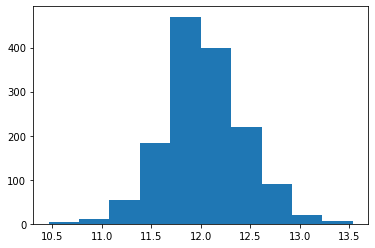

In [279]:
##normalize using log
df['SalePrice']=np.log(df.SalePrice)
plt.hist('SalePrice', data=df)

### Features

Analyze correlation between features. Highly correlated features may require that one needs to be dropped, as they may be explaining the same thing. 

In [280]:
## construct dataframe of correlations between each variable
corr=df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023


In [281]:
##unstack dataframe; view correlation between each variable
corr=corr.unstack()
corr

Id         Id             1.000000
           MSSubClass     0.011156
           LotFrontage   -0.010601
           LotArea       -0.033226
           OverallQual   -0.028365
                            ...   
SalePrice  PoolArea       0.069798
           MiscVal       -0.020021
           MoSold         0.057329
           YrSold        -0.037263
           SalePrice      1.000000
Length: 1444, dtype: float64

In [282]:
## see variable sets with high correlation [greater than 0.7]
corr[(corr>0.7) & (corr!=1)]

OverallQual   SalePrice       0.817184
YearBuilt     GarageYrBlt     0.825667
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
GrLivArea     TotRmsAbvGrd    0.825489
              SalePrice       0.700927
TotRmsAbvGrd  GrLivArea       0.825489
GarageYrBlt   YearBuilt       0.825667
GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
SalePrice     OverallQual     0.817184
              GrLivArea       0.700927
dtype: float64

**Insights**:<br>
    - YearBuilt(i.e., original construction date) is highly correlated with GarageYrBlt. Both of these features are correlated with the outcome variable by the same amount (about 0.54). Given that sellers and buyers will consider the year the house was built rather than the year the garage was built, GarageYrBlt will be dropped.
    
    - TotalBsmtSF (i.e., total square feet of basement) is highly correlated with 1stFlrSF(i.e, square feet of first floor). TotalBsmtSF is more correlated with SalePrice at about 0.6, so 1stFlrSF will be dropped.
    
    - GrLivArea and  TotRmsAbvGrd are highly correlated with one another, but GrLivArea is more correlated with the outcome, so TotRmsAbvGrd will be dropped. 
    
    - GarageCars and GarageArea are highly correlated. GarageArea will be dropped because it is not as correlated with the outcome as GarageCars is.

In [283]:
## drop variables specified above
df=df.drop(columns=['GarageYrBlt','1stFlrSF','TotRmsAbvGrd', 'GarageArea'])

### Missingness 

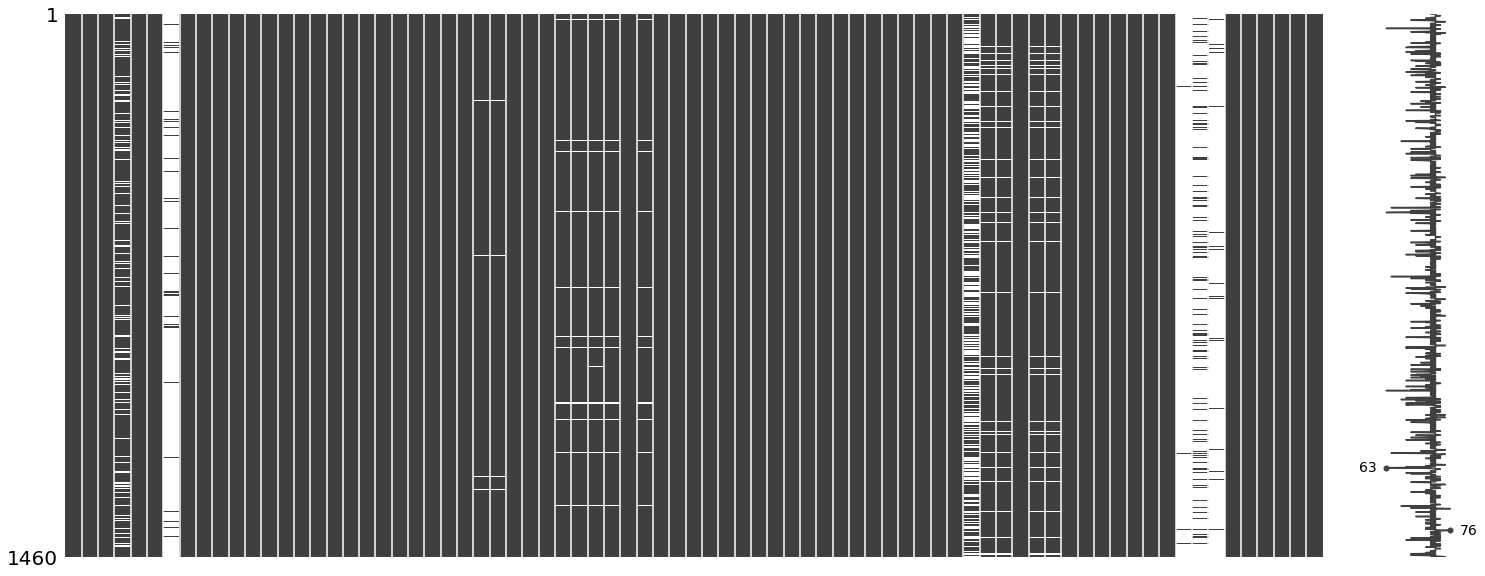

In [284]:
## visually assess missingness
ms.matrix(df)
##there are a few variables missing quite a lot of values

In [285]:
## isolate those with missing values greater than 0
x=df.loc[:,df.isna().sum()>0]
x.isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Alley, PoolQC, Fence, MiscFeature, FireplaceQu, LotFrontage will be dropped since they have a substantial amount of missing values. GarageType, GarageFinish, GarageQual,GarageCond, Bsmt* variables will also be dropped. MasVnrArea will be dropped as well. Since appearance likely determines SalePrice, missing values for MasVnrType(Masonary Veneer Type) will be imputed using the mode. Electrical will be imputed using mode, aswell. 

In [286]:
##remove variables specified above
df=df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage','GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'BsmtQual',
'BsmtCond', 'BsmtExposure', 'BsmtFinType1',"BsmtFinType2", 'MasVnrArea'])

In [291]:
## impute electrical and masvnrtype
for i in df.columns:
    df.loc[:,['Electrical']]=df.loc[:,['Electrical']].fillna(df['Electrical'].mode())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode())

In [267]:
df.fillna({'Electrical': df['Electrical'].mode(), 'MasVnrType': df['MasVnrType'].mode()}, inplace=True)

In [307]:
df=df.apply(lambda x: x.fillna(x.mode(), inplace=True))

In [305]:
df.loc[:,'Electrical'].fillna(df['Electrical'].mode(), inplace=True)